# Principal Component Analysis with Cancer Data

In [1]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline

# Q1. Load the Data file into Python DataFrame and view top 10 rows

In [127]:
os.chdir("C:\\Users\\tshrgpt329\AIML PG")
cancer_data = pd.read_csv("breast-cancer-wisconsin-data.csv")
cancer_data.head(10)

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [128]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done
cancer_data.drop(columns="ID",axis=1,inplace=True)

# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [129]:
cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(9), object(1)
memory usage: 54.7+ KB


There are 10 columns in the dataframe and 699 rows.
Data types of 9 columns is int and one column is of object type.
There are no missing values in the dataset.

In [63]:
cancer_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ClumpThickness,699.0,4.417740,2.815741,1.0,2.0,4.0,6.0,10.0
Cell Size,699.0,3.134478,3.051459,1.0,1.0,1.0,5.0,10.0
Cell Shape,699.0,3.207439,2.971913,1.0,1.0,1.0,5.0,10.0
Marginal Adhesion,699.0,2.806867,2.855379,1.0,1.0,1.0,4.0,10.0
Single Epithelial Cell Size,699.0,3.216023,2.214300,1.0,2.0,2.0,4.0,10.0
Normal Nucleoli,699.0,3.437768,2.438364,1.0,2.0,3.0,5.0,10.0
Bland Chromatin,699.0,2.866953,3.053634,1.0,1.0,1.0,4.0,10.0
Mitoses,699.0,1.589413,1.715078,1.0,1.0,1.0,1.0,10.0
Class,699.0,2.689557,0.951273,2.0,2.0,2.0,4.0,4.0


Column "Mitoses","Bland Chromatin" seems to have outliers.

# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [130]:
# We could see "?" values in column, this should be removed from data set
cancer_data[cancer_data.get_values()=='?']
# Check for missing value in any other column

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
23,8,4,5,1,2,?,7,3,1,4
40,6,6,6,9,6,?,7,8,1,2
139,1,1,1,1,1,?,2,1,1,2
145,1,1,3,1,2,?,2,1,1,2
158,1,1,2,1,3,?,1,1,1,2
164,5,1,1,1,2,?,3,1,1,2
235,3,1,4,1,2,?,3,1,1,2
249,3,1,1,1,2,?,3,1,1,2
275,3,1,3,1,2,?,2,1,1,2
292,8,8,8,1,2,?,6,10,1,4


In [131]:
cancer_data[cancer_data.get_values() == ' ']

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class


In [132]:
# No missing values found. So let us try to remove ? from bare nuclei column
cancer_data['Bare Nuclei'][cancer_data['Bare Nuclei']=='?'].count()

# Get count of rows having ?


16

In [133]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values
cancer_data.replace(to_replace={'Bare Nuclei':'?'},value={'Bare Nuclei':cancer_data['Bare Nuclei'].value_counts().max()},inplace=True)
cancer_data=cancer_data.astype({'Bare Nuclei':np.int64})

# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


In [134]:
# Check for correlation of variable
cancer_data.corr()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
ClumpThickness,1.000000,0.644913,0.654589,0.486356,0.521816,-0.021209,0.558428,0.535835,0.350034,0.716001
Cell Size,0.644913,1.000000,0.906882,0.705582,0.751799,0.006487,0.755721,0.722865,0.458693,0.817904
Cell Shape,0.654589,0.906882,1.000000,0.683079,0.719668,0.025681,0.735948,0.719446,0.438911,0.818934
Marginal Adhesion,0.486356,0.705582,0.683079,1.000000,0.599599,-0.013145,0.666715,0.603352,0.417633,0.696800
Single Epithelial Cell Size,0.521816,0.751799,0.719668,0.599599,1.000000,-0.018709,0.616102,0.628881,0.479101,0.682785
Bare Nuclei,-0.021209,0.006487,0.025681,-0.013145,-0.018709,1.000000,0.021140,0.028954,-0.032119,-0.021444
Normal Nucleoli,0.558428,0.755721,0.735948,0.666715,0.616102,0.021140,1.000000,0.665878,0.344169,0.756616
Bland Chromatin,0.535835,0.722865,0.719446,0.603352,0.628881,0.028954,0.665878,1.000000,0.428336,0.712244
Mitoses,0.350034,0.458693,0.438911,0.417633,0.479101,-0.032119,0.344169,0.428336,1.000000,0.423170
Class,0.716001,0.817904,0.818934,0.696800,0.682785,-0.021444,0.756616,0.712244,0.423170,1.000000


From the correlation above, it can be concluded that most of the atributes are strongly related with each other and with target column.
However the attributes "Mitoses" and "Bare Nuclei" are not related that much (as compared to other columns) with other columns or with target ("class") column.

In [0]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables

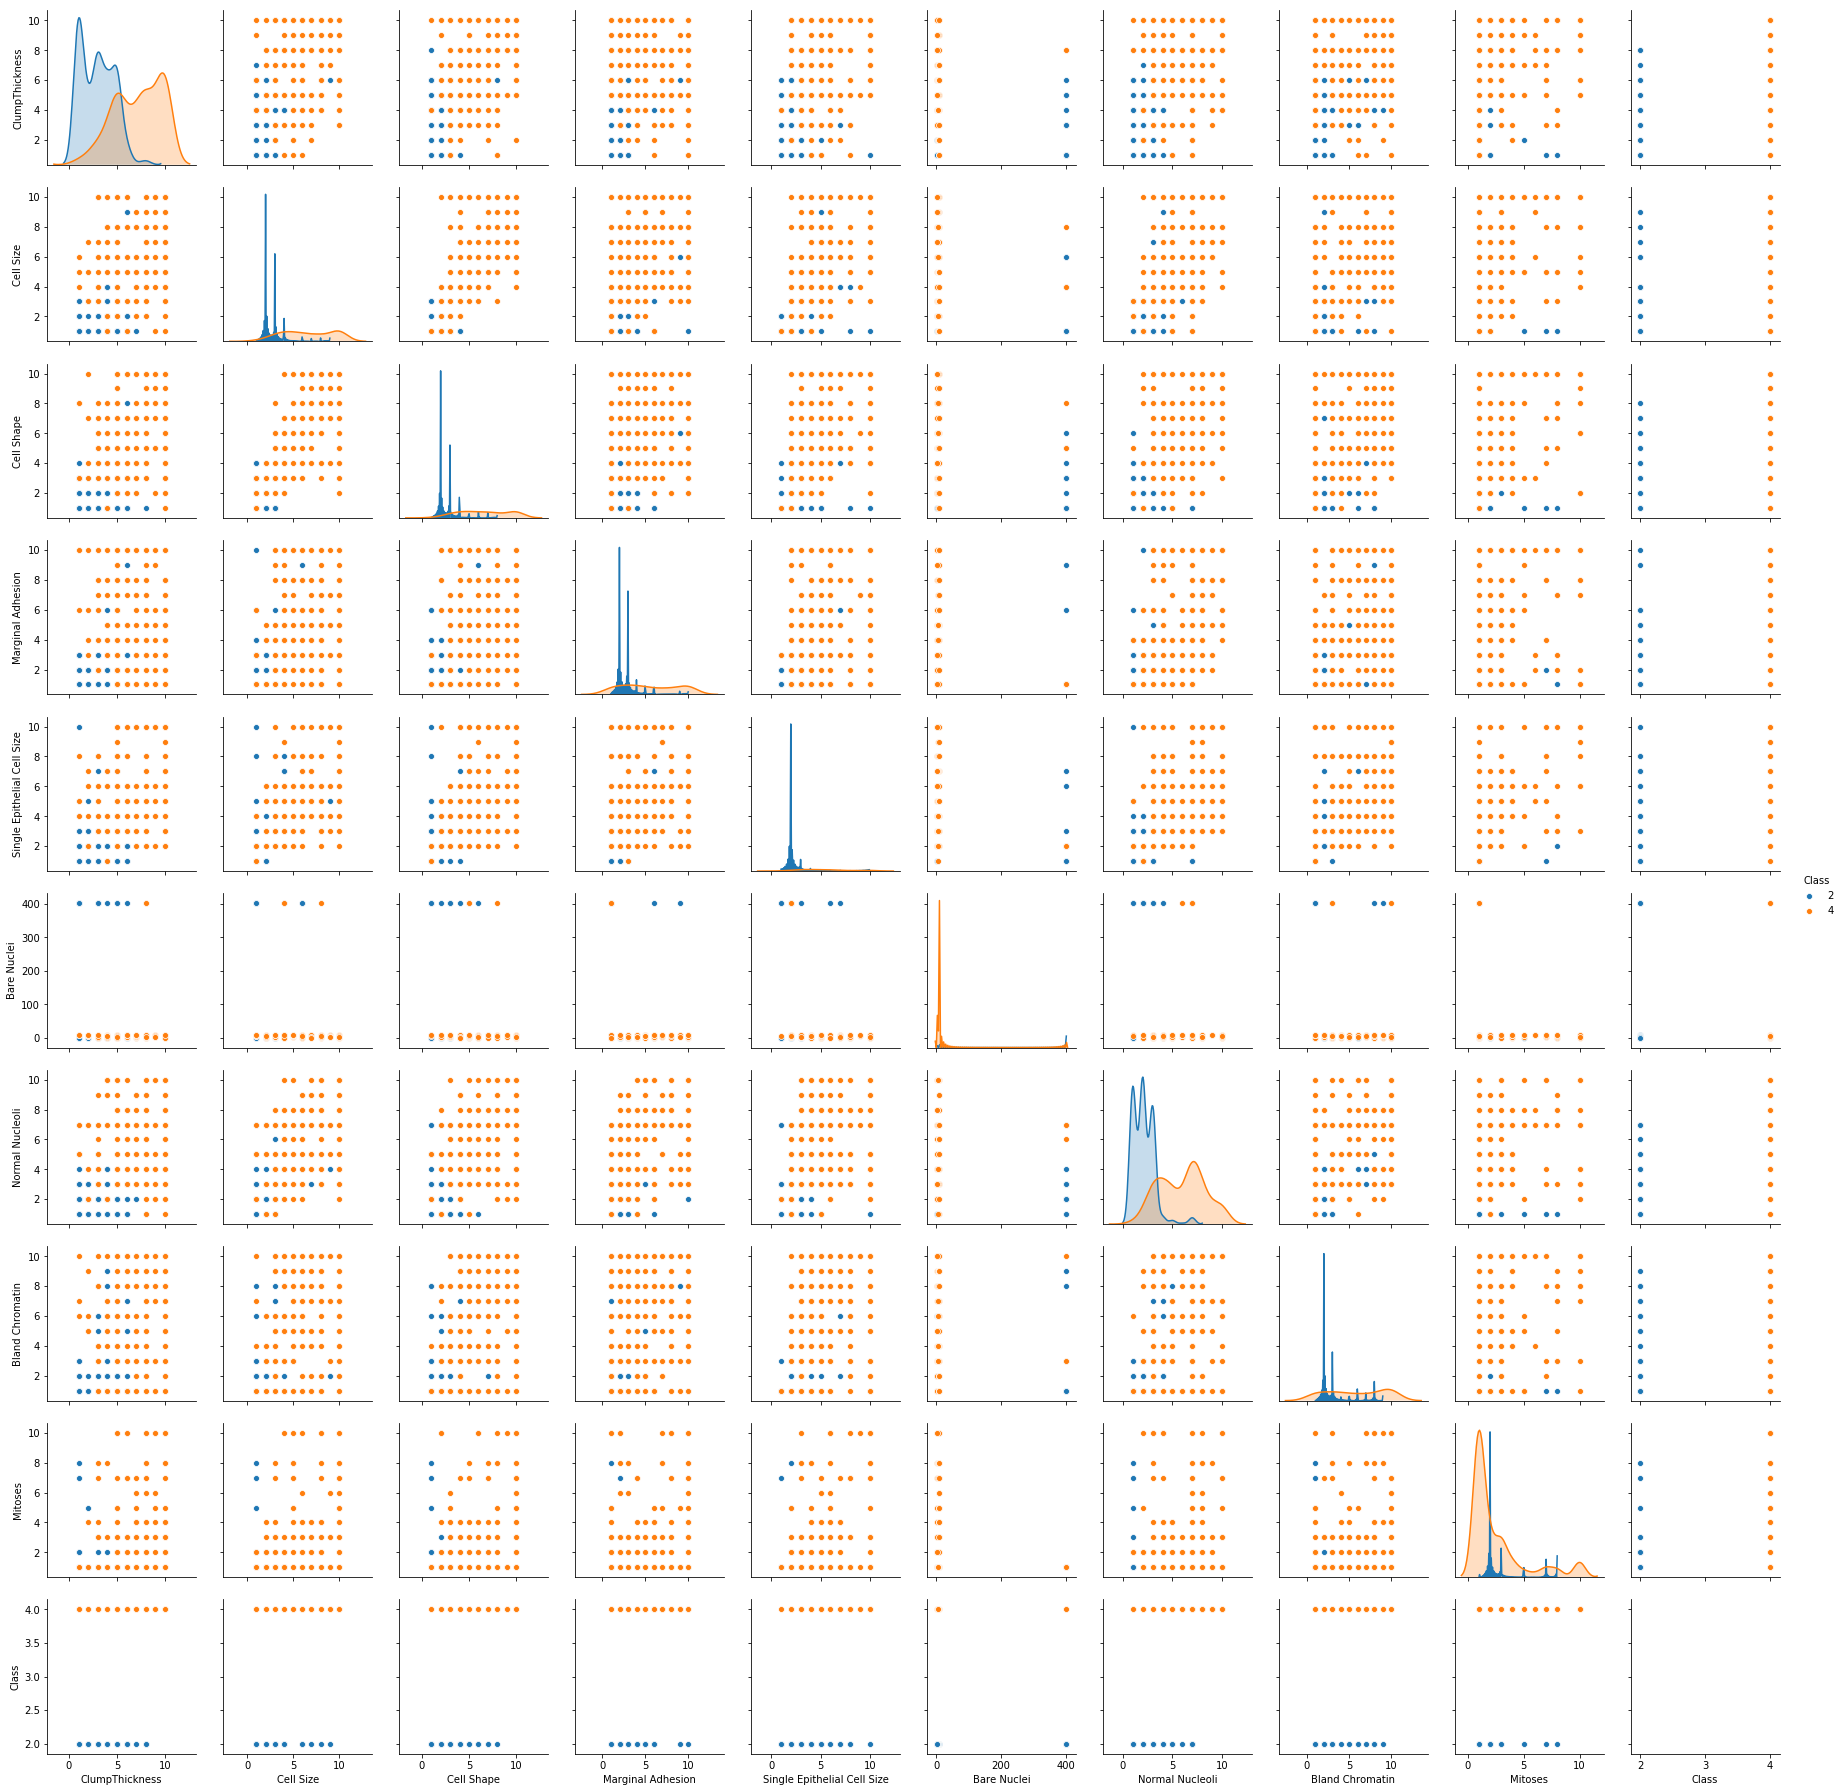

In [69]:
#Let us check for pair plots
sns.pairplot(cancer_data,hue='Class',diag_kind='kde')

In [0]:
# Relationship between variables shows come correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

In [135]:
# We could see most of the outliers are now removed.
pd.crosstab(cancer_data["Mitoses"],cancer_data["Class"])
cancer_data["Mitoses"][cancer_data["Mitoses"]==10]=6

In [136]:
pd.crosstab(cancer_data["Mitoses"],cancer_data["Class"])
cancer_data["Mitoses"][cancer_data["Mitoses"]==6]=4

In [137]:
pd.crosstab(cancer_data["ClumpThickness"],cancer_data["Class"])
cancer_data["ClumpThickness"][cancer_data["ClumpThickness"]==10]=9

In [138]:
pd.crosstab(cancer_data["Cell Shape"],cancer_data["Class"])
cancer_data["Cell Shape"][cancer_data["Cell Shape"]==10]=9
pd.crosstab(cancer_data["Cell Shape"],cancer_data["Class"])

Class,2,4
Cell Shape,,
1,351,2
2,52,7
3,33,23
4,13,31
5,3,31
6,3,27
7,2,28
8,1,27
9,0,65


In [144]:
target_col = cancer_data['Class']
cancer_data.drop(columns='Class',inplace=True,axis=1)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
cancer_data_sc=sc.fit_transform(cancer_data.T)
cancer_data_sc

array([[ 2.45094734,  0.17474081,  1.63299316, ..., -0.4472136 ,
        -0.43437224, -0.55839781],
       [-0.59160798, -0.21842601, -0.81649658, ...,  1.22983739,
         1.12936783,  0.98793459],
       [-0.59160798, -0.21842601, -0.81649658, ...,  0.89442719,
         0.34749779,  0.98793459],
       ...,
       [ 0.92966968, -0.61159284,  1.63299316, ...,  0.55901699,
         1.91123787,  1.7611008 ],
       [-0.59160798, -1.00475967, -0.81649658, ...,  1.22983739,
         0.34749779, -0.55839781],
       [-0.59160798, -1.39792649, -0.81649658, ..., -1.45344419,
        -1.6071773 , -1.71814712]])

# Q6 Create a covariance matrix for identifying Principal components

In [145]:
# PCA
# Step 1 - Create covariance matrix
np.cov(cancer_data_sc)

array([[ 1.53189448, -0.22508402, -0.18241763, -0.21475547, -0.15375636,
        -0.4426261 , -0.22843784, -0.2105295 ,  0.12571243],
       [-0.22508402,  0.41921384,  0.16766871,  0.00463333, -0.1423818 ,
         0.03512543, -0.151052  ,  0.05719694, -0.16532042],
       [-0.18241763,  0.16766871,  0.44732477, -0.04343448, -0.14197923,
         0.01905834, -0.15350125,  0.01755862, -0.13027785],
       [-0.21475547,  0.00463333, -0.04343448,  0.58922076, -0.13822876,
         0.06182164, -0.13844611, -0.02853632, -0.09227459],
       [-0.15375636, -0.1423818 , -0.14197923, -0.13822876,  0.872057  ,
        -0.35908834,  0.03879337, -0.15657997,  0.18116408],
       [-0.4426261 ,  0.03512543,  0.01905834,  0.06182164, -0.35908834,
         1.13367082, -0.26957742, -0.00489425, -0.17349011],
       [-0.22843784, -0.151052  , -0.15350125, -0.13844611,  0.03879337,
        -0.26957742,  0.96967315, -0.10238677,  0.03493486],
       [-0.2105295 ,  0.05719694,  0.01755862, -0.02853632, -0

# Q7 Identify eigen values and eigen vector

In [ ]:
# Step 2- Get eigen values and eigen vector

In [146]:
eig_vals, eig_vecs = np.linalg.eig(np.cov(cancer_data_sc))
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[-0.73323583  0.53365456 -0.33333333 -0.08728546 -0.19096272  0.13555583
  -0.05288027 -0.03306273  0.01079638]
 [ 0.18085181  0.08152099 -0.33333333  0.66115193 -0.36305282 -0.10444378
   0.36579929 -0.11094509 -0.35153972]
 [ 0.14876752  0.09055354 -0.33333333 -0.5439412   0.35038921 -0.1067772
   0.34626823 -0.22259358 -0.50898092]
 [ 0.16445207  0.06682163 -0.33333333 -0.10968437 -0.03382004 -0.07888155
   0.02526698  0.91504701  0.00575102]
 [-0.18395781 -0.49063296 -0.33333333 -0.19148514 -0.3391924  -0.61716359
  -0.24122183 -0.13502576  0.07279315]
 [ 0.52878148  0.35445102 -0.33333333 -0.06108594 -0.12230002  0.12876405
  -0.627181   -0.22615823  0.0622173 ]
 [-0.07515825 -0.5570301  -0.33333333 -0.06694446 -0.12792027  0.73812031
  -0.02057532 -0.01528467 -0.08144865]
 [ 0.15927364  0.05009699 -0.33333333 -0.04811956  0.08207688  0.00840728
   0.46966645 -0.17356118  0.77535685]
 [-0.18977462 -0.12943566 -0.33333333  0.44739421  0.74478219 -0.10358135
  -0.

# Q8 Find variance and cumulative variance by each eigen vector

In [148]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)   # array of size =  as many PC dimensions
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 28.99130599  50.28973413  63.29151992  75.50872701  84.45511268
  92.22252929  96.42717905 100.         100.        ]


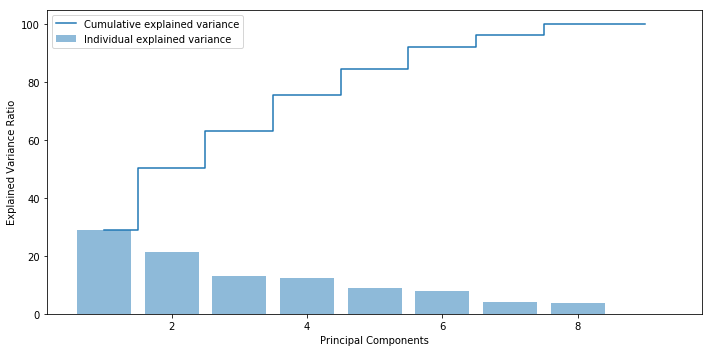

In [149]:
# Ploting 
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [152]:
from sklearn.decomposition import PCA

In [178]:
p_c = PCA()
data_transformed = p_c.fit_transform(cancer_data_sc.T)
p_c.components_

array([[-0.73323583,  0.18085181,  0.14876752,  0.16445207, -0.18395781,
         0.52878148, -0.07515825,  0.15927364, -0.18977462],
       [-0.53365456, -0.08152099, -0.09055354, -0.06682163,  0.49063296,
        -0.35445102,  0.5570301 , -0.05009699,  0.12943566],
       [-0.13555583,  0.10444378,  0.1067772 ,  0.07888155,  0.61716359,
        -0.12876405, -0.73812031, -0.00840728,  0.10358135],
       [-0.05288027,  0.36579929,  0.34626823,  0.02526698, -0.24122183,
        -0.627181  , -0.02057532,  0.46966645, -0.26514253],
       [-0.03306273, -0.11094509, -0.22259358,  0.91504701, -0.13502576,
        -0.22615823, -0.01528467, -0.17356118,  0.00158424],
       [ 0.01079638, -0.35153972, -0.50898092,  0.00575102,  0.07279315,
         0.0622173 , -0.08144865,  0.77535685,  0.01505459],
       [-0.19096272, -0.36305282,  0.35038921, -0.03382004, -0.3391924 ,
        -0.12230002, -0.12792027,  0.08207688,  0.74478219],
       [-0.08728546,  0.66115193, -0.5439412 , -0.10968437, -0

# Q10 Find correlation between components and features

In [182]:
dfa_pca = pd.DataFrame(p_c.components_,columns=cancer_data.columns)

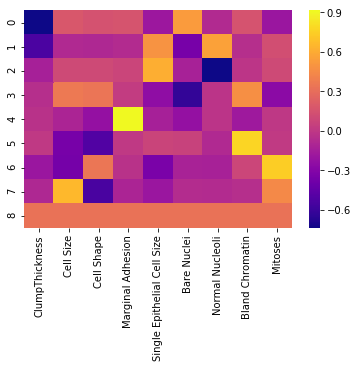

In [183]:
sns.heatmap(dfa_pca,cmap='plasma')

# Content Based Recommendation System - Optional ( Q11 - Q18 will not be graded)

# Q11 Read the Dataset `movies_metadata.csv`

# Q12 Create a new column with name 'description' combining `'overview' and 'tagline'` columns in the given dataset

# Q13  Lets drop the null values in `description` column

# Q14 Keep the first occurance and drop duplicates of each title in column `title`

# Q15   As we might have dropped a few rows with duplicate `title` in above step, just reset the index [make sure you are not adding any new column to the dataframe while doing reset index]

# Q16  Create cosine similarity matrix

# Q17  Write a function with name `recommend` which takes `title` as argument and returns a list of 10 recommended title names in the output based on the above cosine similarities

Hint:

titles = df['title'] <br>
indices = pd.Series(df.index, index=df['title']) <br>

def recommend(title): <br>
    idx = indices[title] <br>
    sim_scores = list(enumerate(cosine_similarities[idx])) <br>
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True) <br>
    sim_scores = sim_scores[1:31] <br>
    movie_indices = [i[0] for i in sim_scores] <br>
    return titles.iloc[movie_indices] <br>

# Q18 Give the recommendations from above functions for movies `The Godfather` and `The Dark Knight Rises`

# Popularity Based Recommendation System

### About Dataset

Anonymous Ratings on jokes.

1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").

2. One row per user

3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.

# Q19 Read the dataset(jokes.csv)

Take care about the header in read_csv() as there are no column names given in the dataset. 

In [168]:
jokes_data = pd.read_csv("jokes.csv")
jokes_data.head(5)

,NumJokes,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q20 Consider `ratings` named dataframe with only first 200 rows and all columns from 1(first column is 0) of dataset

In [203]:
ratings = jokes_data.iloc[0:200,1:]
ratings.shape

(200, 100)

# Q21 Change the column indices from 0 to 99

In [207]:
ratings.columns = np.arange(0,100)
ratings.columns

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
            68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
            85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99],
           dtype='int64')

# Q22 In the dataset, the null ratings are given as 99.00, so replace all 99.00s with 0
Hint: You can use `ratings.replace(<the given value>, <new value you wanted to change with>)`

In [210]:
ratings.replace(99, 0,inplace=True)
ratings.head(5)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,0.00,0.00,0.00,0.00,0.00,-5.63,0.00,0.00,0.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,0.00,0.00,0.00,0.00,9.03,9.27,9.03,9.27,0.00,0.00,...,0.00,0.00,0.00,9.08,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,8.35,0.00,0.00,1.80,8.16,-2.82,6.21,0.00,1.84,...,0.00,0.00,0.00,0.53,0.00,0.00,0.00,0.00,0.00,0.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q23 Normalize the ratings using StandardScaler and save them in `ratings_diff` variable

In [211]:
ratings_diff=sc.fit_transform(ratings)

### Popularity based recommendation system

# Q24  Find the mean for each column  in `ratings_diff` i.e, for each joke
Consider all the mean ratings and find the jokes with highest mean value and display the top 10 joke IDs.

In [238]:
df=pd.DataFrame(ratings_diff.mean(axis=0))
df

,0
0,0.000000e+00
1,1.776357e-17
2,-2.886580e-17
3,-1.332268e-17
4,-2.220446e-18
5,-6.661338e-18
6,6.661338e-18
7,1.665335e-17
8,-5.329071e-17
9,8.881784e-18


In [236]:
top_10_ids = np.argsort(ratings_diff.mean(axis=0))[0:10]
top_10_ids

array([15, 31, 65, 79, 25,  8, 11, 90, 10, 91], dtype=int64)